# Hypothesis testing and statistical analysis on UK Census Data

## Data Retrieval:

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
pop_df = pd.read_csv('census11sample.csv') # May need to set appropriate non relative path to find data file
pop_df

,Unnamed: 0,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,0,27,32,65,60,44,79,43,8,9
1,1,10,36,40,19,52,46,58,87,40
2,2,82,53,60,34,2,29,18,46,57
3,3,33,63,25,60,9,26,30,52,74
4,4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...,...
995,995,42,59,47,37,61,67,29,16,21
996,996,49,45,16,80,87,86,4,79,74
997,997,31,5,25,39,52,22,17,8,34
998,998,38,69,52,4,3,76,24,51,94


## Data Partition:

In [2]:
pop_df = pop_df.drop(["Unnamed: 0"], axis=1)
pop_df

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...
995,42,59,47,37,61,67,29,16,21
996,49,45,16,80,87,86,4,79,74
997,31,5,25,39,52,22,17,8,34
998,38,69,52,4,3,76,24,51,94


<h3> Dividing data - I intend to take a systematic random sample of the data; this is obtained by generating a random starting value n and increment i, then selecting every 'ith' value to form a new data set df1, which is used for hypothesis exploring and generation, with the remaining data placed into a data set df2 for hypothesis testing (note the code comments below). <h3>

In [3]:
random_n = random.randint(0, 1000)
random_i = random.randint(1, 101)
if random_i == random_n:
    random_i += 1
df1 = pd.DataFrame(columns=["North East", "North West", "Yorkshire and The Humber", "East Midlands", "West Midlands", "East of England", "London", "South East", "South West"])
df2 = pd.DataFrame(columns=["North East", "North West", "Yorkshire and The Humber", "East Midlands", "West Midlands", "East of England", "London", "South East", "South West"])
x = 0
vals = []
while(x < 500):
    scaled_n = random_n%1000
    while scaled_n in vals: # Preventing appearance of duplicate data
        scaled_n += 1
        scaled_n = scaled_n % 1000
    df1 = df1.append(pop_df.iloc[scaled_n])
    random_n += random_i
    x += 1
    vals += [scaled_n] # Track previously encountered indices
    
for x in ([z for z in range(1000) if z not in vals]):
    df2 = df2.append(pop_df.iloc[x]) 
    
# The data sets should now:
# - Combine to form the original data set, with no overlapping data (i.e. they form a partition of the original data)
# - Possess randomly sampled data from the original set, partitioned to prevent bias from exploration to testing
# - Be of equal size

## Data Exploration:

<h3> We begin by forming scatter plots displaying ages of individuals in various regions: </h3>

Text(0.5, 1.0, 'Ages of people in London')

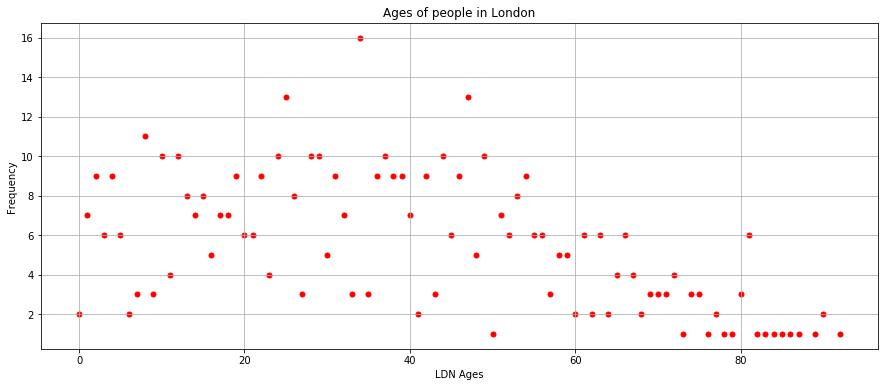

In [39]:
df_ldn = pd.DataFrame(pd.value_counts(df1["London"].values))
df.index.name = "Age"
df.sort_index(inplace=True)

fig, ax = plt.subplots(figsize=(15,6))

ax.scatter(df_ldn.index,df_ldn[0],marker='.', s=100, c='r')
ax.set_xlabel('LDN Ages')
ax.set_ylabel('Frequency')
ax.grid(True)
plt.title('Ages of people in London')


     0
18  12
14  11
42  11
39  10
4   10
..  ..
92   1
93   1
81   1
2    1
98   1

[94 rows x 1 columns]


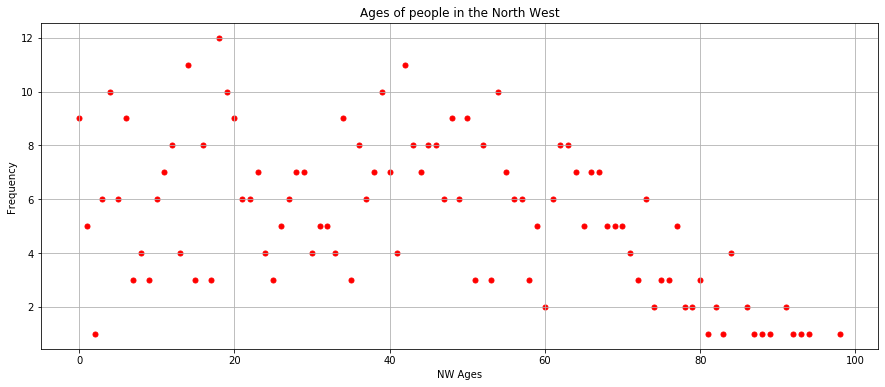

In [31]:
df_nw = pd.DataFrame(pd.value_counts(df1["North West"].values))
df_nw
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter(df_nw.index,df_nw[0],marker='.', s=100, c='r')
ax.set_xlabel('NW Ages')
ax.set_ylabel('Frequency')
ax.grid(True)
plt.title('Ages of people in the North West')
print(df_nw)

Text(0.5, 1.0, 'Ages of people in the North East')

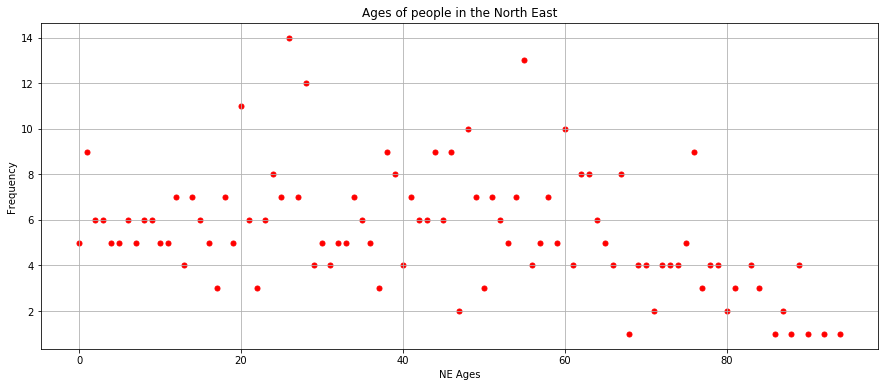

In [6]:
df_ne = pd.DataFrame(pd.value_counts(df1["North East"].values))
df_ne = df_ne.dropna()

fg, az = plt.subplots(figsize=(15,6))

az.scatter(df_ne.index,df_ne[0],marker='.', s=100, c='r')
az.set_xlabel('NE Ages')
az.set_ylabel('Frequency')
az.grid(True)
plt.title('Ages of people in the North East')

Text(0.5, 1.0, 'Ages of people in England')

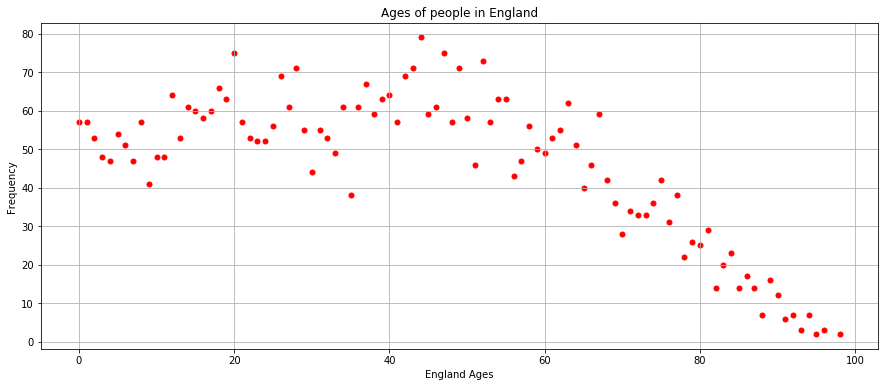

In [38]:
df_temp = []
for x in df1.values:
    for y in x:
        df_temp.append(y)
df_agg = pd.DataFrame(pd.value_counts(df_temp))

fg, az = plt.subplots(figsize=(15,6))

az.scatter(df_agg.index,df_agg[0],marker='.', s=100, c='r')
az.set_xlabel('England Ages')
az.set_ylabel('Frequency')
az.grid(True)
plt.title('Ages of people in England')

<h3> We observe from the above graphics for a few select regions (NW, NE and LDN) (and then attempt to observe from a plot for the entirity of England) that the age data peaks around the middle of the possible value set (~ 40 years old) i.e. there exists a central tendency of the data set and the data appears to tail off at each end i.e. age data is a naturally occuring example of normally distributed data (a fact that can be used in testing later). <h3>
    
<h3> We go on to measure some descriptive statistics for all regions given in order to observe a trend in the data to form a testible hypothesis: <h3>

In [13]:
import numpy as np
def desc_stats(val, frq):
    val = np.array(val)
    frq = np.array(frq)
    val_sort = np.argsort(val)
    val = val[val_sort]
    frq = frq[val_sort] # Using sorted arrays for efficiency in later calculations
    tot = frq.sum()
    sum_stat = val * frq
    mean = sum_stat.sum() / tot
    var = ((frq * val**2).sum() / tot) - mean**2
    var = tot / (tot - 1) * var  # population variance correction for sample variance
    std = np.sqrt(var)
    min_val = np.min(val)
    max_val = np.max(val)
    cc = np.cumsum(frq)
    Q1 = val[np.searchsorted(cc, 0.25*tot)]
    Q2 = val[np.searchsorted(cc, 0.50*tot)]
    Q3 = val[np.searchsorted(cc, 0.75*tot)]
    idx = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    res = pd.Series([tot, mean, std, min_val, Q1, Q2, Q3, max_val], index=idx)
    return str(res)+"\n"

In [8]:
#print(df1["South West"])
print("NW: \n" + desc_stats(pd.value_counts(df1["North West"].values).reset_index()["index"], pd.value_counts(df1["North West"].values).reset_index()[0]))
print("NE: \n" + desc_stats(pd.value_counts(df1["North East"].values).reset_index()["index"], pd.value_counts(df1["North East"].values).reset_index()[0]))
print("SW: \n" + desc_stats(pd.value_counts(df1["South West"].values).reset_index()["index"], pd.value_counts(df1["South West"].values).reset_index()[0]))
print("SE: \n" + desc_stats(pd.value_counts(df1["South East"].values).reset_index()["index"], pd.value_counts(df1["South East"].values).reset_index()[0]))
print("LDN: \n" + desc_stats(pd.value_counts(df1["London"].values).reset_index()["index"], pd.value_counts(df1["London"].values).reset_index()[0]))
print("YRK: \n" + desc_stats(pd.value_counts(df1["Yorkshire and The Humber"].values).reset_index()["index"], pd.value_counts(df1["Yorkshire and The Humber"].values).reset_index()[0]))
print("EoE: \n" + desc_stats(pd.value_counts(df1["East of England"].values).reset_index()["index"], pd.value_counts(df1["East of England"].values).reset_index()[0]))
print("EM: \n" + desc_stats(pd.value_counts(df1["East Midlands"].values).reset_index()["index"], pd.value_counts(df1["East Midlands"].values).reset_index()[0]))
print("WM: \n" + desc_stats(pd.value_counts(df1["West Midlands"].values).reset_index()["index"], pd.value_counts(df1["West Midlands"].values).reset_index()[0]))


NW: 
count    500.000000
mean      39.618000
std       23.499458
min        0.000000
25%       19.000000
50%       40.000000
75%       57.000000
max       98.000000
dtype: float64

NE: 
count    500.000000
mean      40.346000
std       23.739955
min        0.000000
25%       21.000000
50%       40.000000
75%       59.000000
max       94.000000
dtype: float64

SW: 
count    500.000000
mean      43.750000
std       24.852823
min        0.000000
25%       22.000000
50%       44.000000
75%       62.000000
max       98.000000
dtype: float64

SE: 
count    500.00000
mean      39.68000
std       23.28833
min        0.00000
25%       20.00000
50%       41.00000
75%       58.00000
max       93.00000
dtype: float64

LDN: 
count    500.000000
mean      36.134000
std       21.761507
min        0.000000
25%       19.000000
50%       34.000000
75%       52.000000
max       92.000000
dtype: float64

YRK: 
count    500.000000
mean      38.504000
std       22.665689
min        0.000000
25%       20.000

<h3> We use our findings in this data exploration stage to form and justify a hypothesis below: </h3>

## Hypothesis and Justifying Evidence:

<h3> We gather our data and obervations to form the following hypothesis: "The ages of individuals on average in the West section of England is greater than in the East." </h3>

<h3> Our above descriptive statistics communicate that both the mean and 50% value (median) for both the West Midlands and the South West are greater than their respective Eastern counterparts. Given this, plus London (an Eastern region) having a significantly lower average age than any other region (plus other statistical points above) we have a reasonable quantity of evidence to form such a hypothesis as above.</h3>

## Formalisation and Test to Conduct:

<h3> Null hypothesis (H0): "The ages of individuals on average in the West section of England (Aw) is not different to those in the East (Ae) i.e. Aw = Ae."</h3>

<h3> Alternative hypothesis (H1): "The ages of individuals on average in the West section of England (Aw) is greater than in the East (Ae) i.e. Aw > Ae" </h3>

<h3> Probability level (alpha) = 10% (0.1) </h3>

<h3> I aim to conduct a one-tailed Z test to tell if the probability of the null hypothesis holding is greater than alpha (i.e. Prob(H0) > 0.1 so test is not statistically significant) or less than alpha (i.e. Prob(H0) < 0.1 so test is statistically significant and we can rule out H0 in favour of observed hypothesis H1) </h3>

<h3> The "East section of England" encompasses the following regions: North East, South East, East Midlands, Yorkshire and the Humber, East of England and London </h3>

<h3> The "West section of England" encompasses the following regions: North West, South West, West Midlands </h3>

## Hypothesis Testing:

<h3>  Measure descriptive stats for East and West of England, in particular to perform a Z test to compare the two distributions formed by the data for each region (using test set df2 generated earlier): </h3>

In [45]:
df_east = pd.concat([df2["North East"],df2["South East"],df2["East Midlands"],df2["Yorkshire and The Humber"],df2["East of England"],df2["London"]], ignore_index=True, sort=False)
#print("E: \n" + desc_stats(pd.value_counts(dfs1.values).reset_index()["index"], pd.value_counts(dfs1.values).reset_index()[0]))
v1 = pd.value_counts(df_east.values).reset_index()["index"]
v2 = pd.value_counts(df_east.values).reset_index()[0]
values1 = np.array(v1)
freqs1 = np.array(v2)
arg_sorted1 = np.argsort(values1)
values1 = values1[arg_sorted1]
freqs1 = freqs1[arg_sorted1]
count1 = freqs1.sum()
fx1 = values1 * freqs1
mean1 = fx1.sum() / count1
variance1 = ((freqs1 * values1**2).sum() / count1) - mean1**2
variance1 = count1 / (count1 - 1) * variance1
std1 = np.sqrt(variance1)



df_west = pd.concat([df2["South West"],df2["North West"],df2["West Midlands"]], ignore_index=True, sort=False)
#print("E: \n" + desc_stats(pd.value_counts(dfn1.values).reset_index()["index"], pd.value_counts(dfn1.values).reset_index()[0]))
m1 = pd.value_counts(df_west.values).reset_index()["index"]
m2 = pd.value_counts(df_west.values).reset_index()[0]
values2 = np.array(m1)
freqs2 = np.array(m2)
arg_sorted2 = np.argsort(values2)
values2 = values2[arg_sorted2]
freqs2 = freqs2[arg_sorted2]
count2 = freqs2.sum()
fx2 = values2 * freqs2
mean2 = fx2.sum() / count2
variance2 = ((freqs2 * values2**2).sum() / count2) - mean2**2
variance2 = count2 / (count2 - 1) * variance2
std2 = np.sqrt(variance2)

print("Mean age of the East: " +str(mean1))
print("Standard Dist. of age of the East: " +str(std1))
print("East count: "+str(count1))
print("\n")
print("Mean age of the West: " +str(mean2))
print("Standard Dist. of age of the West: " +str(std2))
print("West count: "+str(count2))

z = (mean2 - mean1)/np.sqrt( (std2/np.sqrt(count2))**2 + (std1/np.sqrt(count1))**2) # Difference in means divided by root of sum of squares of SEMs (standard formula)
print("\n")
print("Z test value: " + str(z))

Mean age of the East: 39.358
Standard Dist. of age of the East: 23.205473506629623
East count: 3000


Mean age of the West: 40.797333333333334
Standard Dist. of age of the West: 23.50229417404148
West count: 1500


Z test value: 1.9448025733291514


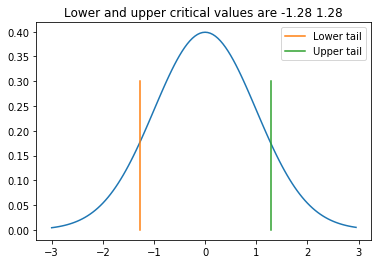

Z test value: 1.9448025733291514
The 10.00 percent critical value is 1.28


In [46]:
from scipy import stats
from scipy.stats import norm # methods for working with a normal distribution
alpha=0.1
critical_value = norm.ppf(1-alpha,0,1) # the inverse CDF
#alpha = 0.1
mu = 0
sgm = 1
lower = stats.norm.ppf(alpha,mu,sgm)
upper = stats.norm.ppf(1-alpha,mu,sgm)
x=np.arange(-3,3,0.05)
y=stats.norm.pdf(x,mu,sgm) 

plt.plot(x,y)
plt.plot([lower,lower],[0,0.3],label="Lower tail")
plt.plot([upper,upper],[0,0.3],label="Upper tail")
plt.legend()
plt.title("Lower and upper critical values are %2.2f %2.2f" %(lower,upper))
plt.show()

print("Z test value: " + str(z))
print("The %2.2f percent critical value is %2.2f" %(alpha*100,critical_value))

## Conclusions:

<h3> Using the one tailed Z test method, I have found that the calculated Z value for the above test falls into the critical region, thus the null hypothesis H0 is ruled out at the 10 percent probability level. </h3>